# Initial value problem for colliding gravitational plane waves I by Hauser & Ernst
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://aip.scitation.org/doi/abs/10.1063/1.528355

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
rho = Function('rho')(u,v)
rho

In [5]:
psi = Function('psi')(u,v)
psi

In [6]:
gamma = Function('gamma')(u,v)
gamma

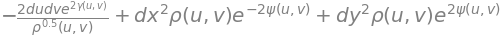

In [16]:
lineElement = expand( rho * ( exp(-2*psi) * dx**2 + exp(2*psi) * dy**2 ) - (2/rho**(1/2)) * ( exp(2*gamma)*du*dv) )
lineElement 